47.75% of samples were correctly classified
with_mask


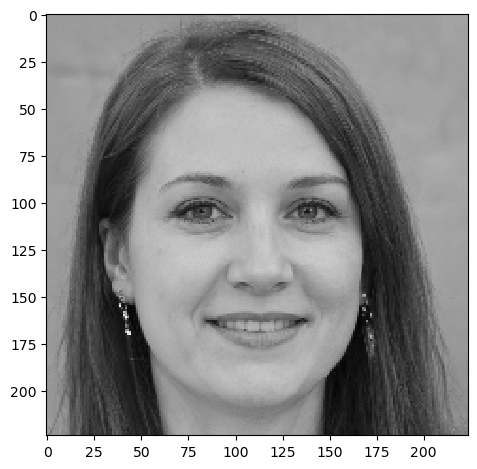

In [23]:
# SVC classifier

#### In this code I have guided here:
 ##### 01. How to create svc model
 ##### 02.  Extract model to pickel file
 ##### 03.  use pickel file to validata a test image


### load required libraries
import numpy as np 
import pandas as pd 
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skimage import io
import os
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


df = pd.DataFrame(columns=['image_path','Lable', 'flatten'])

#import os
#for dirname, _, filenames in os.walk('/kaggle/input/facemask-detection-dataset-20000-images'):
def load_data_to_data_frame():
  images_with_mask=0
  images_with_mask_limit=1000
  images_without_mask=0
  images_without_mask_limit=1000
  

  for dirname, _, filenames in os.walk('/kaggle/input/facemask-detection-dataset-20000-images'):
  #for dirname, _, filenames in os.walk('/kaggle/input/facemask-detection-dataset-20000-images'):
    for filename in filenames:
      path=os.path.join(dirname, filename)
      #print(path)
      if '/new_without_mask'in path:
        if images_without_mask<images_without_mask_limit:
          images_without_mask=images_without_mask+1
          #print("images_without_mask"+str(images_without_mask))
            #path=os.path.join(dirname, filename)
            #print(os.path.join(dirname, filename))
          img = imread(path) 
          img = resize(img, (15, 15)) 
          new_row = {'image_path': path, 'Lable': 'without_mask', 'flatten': img.flatten()} 
          # Use the loc method to add the new row to the DataFrame
          df.loc[len(df)] = new_row
      if '/new_without_mask'in path:
        if images_with_mask<images_with_mask_limit:    
          images_with_mask=images_with_mask+1
          #print("images_with_mask"+str(images_with_mask))
            #path=os.path.join(dirname, filename)
            #print(os.path.join(dirname, filename))
          img = imread(path) 
          img = resize(img, (15, 15)) 
          new_row = {'image_path': path, 'Lable': 'with_mask', 'flatten': img.flatten()} 
          # Use the loc method to add the new row to the DataFrame
          df.loc[len(df)] = new_row
      #if (images_without_mask>=images_without_mask_limit):
        #if (images_with_mask>=images_with_mask_limit):
          #break
          #break
  #print(df.head)

load_data_to_data_frame()

df.shape

### Prepossessing labels

lable_encoder_df_lable= preprocessing.LabelEncoder()
lable_encoder_df_lable.fit(df['Lable'])
df['Category_label']=lable_encoder_df_lable.transform(df['Lable'])

df_train,df_test=train_test_split(df, test_size=0.2,shuffle=True)


### create classifier Model

classifier = SVC()

parameters = [{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]
grid_search = GridSearchCV(classifier, parameters)
grid_search.fit(df_train['flatten'].tolist(), df_train['Category_label'])


best_estimator = grid_search.best_estimator_
y_prediction = best_estimator.predict(df_test['flatten'].tolist())
score = accuracy_score(y_prediction, df_test['Category_label'])

print('{}% of samples were correctly classified'.format(str(score * 100)))

### create dump file from the model

pickle.dump(best_estimator, open('./model.p', 'wb'))

### use dump to predict test file

pickled_model = pickle.load(open('/kaggle/working/model.p', 'rb'))

test_image_path='/kaggle/input/facemask-detection-dataset-20000-images/new_without_mask/seed0000.png'
img_new = imread(test_image_path) 
img = resize(img_new, (15, 15)) 
#img_latten= img.flatten()
df_P = pd.DataFrame(columns=['flatten'])
new_row = {'flatten': img.flatten()} 
df_P.loc[len(df_P)] = new_row
value=pickled_model.predict(df_P['flatten'].tolist())[0]

print(lable_encoder_df_lable.classes_[value])

io.imshow(img_new)
#test_image_path.show()